In [1]:
from sklearn import svm, model_selection
from sklearn import metrics
from sklearn.preprocessing import normalize
import json
import itertools
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
DATASET_NAME = '../../json_final/generated/baseline'
true_dataset = utils.load_from_json('%s.json' % DATASET_NAME)
print('Loaded dataset with %i classes:' % len(true_dataset))
for klass, sounds in true_dataset.items():
    print('\t%s: %i sounds' % (klass, len(sounds)))
class_names = list(true_dataset.keys())

Loaded dataset with 13 classes:
	Coin (dropping): 127 sounds
	Cupboard open or close: 104 sounds
	Door: 155 sounds
	Drawer open or close: 117 sounds
	Keys jangling: 122 sounds
	Microwave oven: 98 sounds
	Packing tape, duct tape: 95 sounds
	Scissors: 126 sounds
	Toilet flush: 156 sounds
	Typing: 153 sounds
	Vacuum cleaner: 102 sounds
	Writing: 147 sounds
	Zipper (clothing): 132 sounds


In [5]:
class_names

['Coin (dropping)',
 'Cupboard open or close',
 'Door',
 'Drawer open or close',
 'Keys jangling',
 'Microwave oven',
 'Packing tape, duct tape',
 'Scissors',
 'Toilet flush',
 'Typing',
 'Vacuum cleaner',
 'Writing',
 'Zipper (clothing)']

In [6]:
# CODE TO CLEAN DATASET (remove sounds which do not have analysis information)
dataset_cleaned = {}
for key, sounds in true_dataset.items():
    if key not in dataset_cleaned:
        dataset_cleaned[key] = []
    for sound in sounds:
        if sound['analysis'] is not None:
            dataset_cleaned[key].append(sound)

In [7]:
def build_feature_vector(sound):
    features = []
    #add control if they have it or not
    if (sound['analysis']):
        mfcc_1 = sound['analysis']['lowlevel']['mfcc']['mean'][1]
        mfcc_1_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][1]
        mfcc_2 = sound['analysis']['lowlevel']['mfcc']['mean'][2]
        mfcc_2_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][2]
        mfcc_3 = sound['analysis']['lowlevel']['mfcc']['mean'][3]
        mfcc_3_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][3]
        mfcc_4 = sound['analysis']['lowlevel']['mfcc']['mean'][4]
        mfcc_4_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][4]
        mfcc_5 = sound['analysis']['lowlevel']['mfcc']['mean'][5]
        mfcc_5_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][5]
        mfcc_6 = sound['analysis']['lowlevel']['mfcc']['mean'][6]
        mfcc_6_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][6]
        mfcc_7 = sound['analysis']['lowlevel']['mfcc']['mean'][7]
        mfcc_7_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][7]
        mfcc_8 = sound['analysis']['lowlevel']['mfcc']['mean'][8]
        mfcc_8_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][8]
        mfcc_9 = sound['analysis']['lowlevel']['mfcc']['mean'][9]
        mfcc_9_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][9]
        mfcc_10 = sound['analysis']['lowlevel']['mfcc']['mean'][10]
        mfcc_10_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][10]
        mfcc_11 = sound['analysis']['lowlevel']['mfcc']['mean'][11]
        mfcc_11_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][11]
        mfcc_12 = sound['analysis']['lowlevel']['mfcc']['mean'][12]
        mfcc_12_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][12]

        #feature vector creation
        features = np.concatenate([[], features, np.array([mfcc_1])])
        features = np.concatenate([[], features, np.array([mfcc_1_1])])
        features = np.concatenate([[], features, np.array([mfcc_2])])
        features = np.concatenate([[], features, np.array([mfcc_2_1])])
        features = np.concatenate([[], features, np.array([mfcc_3])])
        features = np.concatenate([[], features, np.array([mfcc_3_1])])
        features = np.concatenate([[], features, np.array([mfcc_4])])
        features = np.concatenate([[], features, np.array([mfcc_4_1])])
        features = np.concatenate([[], features, np.array([mfcc_5])])
        features = np.concatenate([[], features, np.array([mfcc_5_1])])
        features = np.concatenate([[], features, np.array([mfcc_6])])
        features = np.concatenate([[], features, np.array([mfcc_6_1])])
        features = np.concatenate([[], features, np.array([mfcc_7])])
        features = np.concatenate([[], features, np.array([mfcc_7_1])])
        features = np.concatenate([[], features, np.array([mfcc_8])])
        features = np.concatenate([[], features, np.array([mfcc_8_1])])
        features = np.concatenate([[], features, np.array([mfcc_9])])
        features = np.concatenate([[], features, np.array([mfcc_9_1])])
        features = np.concatenate([[], features, np.array([mfcc_10])])
        features = np.concatenate([[], features, np.array([mfcc_10_1])])
        features = np.concatenate([[], features, np.array([mfcc_11])])
        features = np.concatenate([[], features, np.array([mfcc_11_1])])
        features = np.concatenate([[], features, np.array([mfcc_12])])
        features = np.concatenate([[], features, np.array([mfcc_12_1])])
    else:
        print(str(sound['id']) + ": has no analysis")
        #this is wrong but should never happen because we clean the dataset(only for debug)
        features = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    return features

In [8]:
# Prepare data for fitting classifier (as sklearn classifiers require)
y = list()
X = list()
for class_name, sounds in dataset_cleaned.items():
    for count, sound in enumerate(sounds):
        # Use index of class name in class_names as numerical value (classifier internally represents
        # class label as number)
        y.append(class_names.index(class_name))
        feature_vector = build_feature_vector(sound)
        X.append(np.array(feature_vector))

In [9]:
#normalize features
X_normalized = normalize(X)

#with normalization it performs worse!!

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [11]:
#svc_param_selection(X, y, 10)

In [12]:
classifier = svm.SVC(C=10, gamma=0.001, probability=True)
classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

I'll try the probability thing on X-train, thhen i'll need to do it on candidates

In [38]:
probabilities_df = pd.DataFrame(columns=['coi', 'cpb', 'dor', 'drw', 'key', 'mrw', 'pck', 'sci', 'tof', 'typ', 'vcc', 'wrt', 'zip'])

prob_per_class_dictionary = dict(zip(classifier.classes_, results))

In [33]:
X_train[0]

array([ 76.33,  11.47,   9.23,   8.21,   1.25,   6.6 ,  -4.12,   7.03,
         2.76,   5.58,   1.94,   5.85,  -2.14,   7.2 ,  -2.6 ,   5.29,
        -0.4 ,   5.43,   1.63,   4.41,   1.24,   3.54,  -0.65,   4.58])

In [47]:
results = classifier.predict_proba(X_train)[0]

In [48]:
type(results)

numpy.ndarray

In [50]:
#A = np.matrix(results)
#for idx, val in enumerate(X_train):
    #results = classifier.predict_proba(X_train)[idx + 1]
    #prob_per_class_dictionary = dict(zip(classifier.classes_, results))
    #probabilities_df.loc[idx] = [results]
    #A = np.vstack([A, results])

In [51]:
results_ordered_by_probability = map(lambda x: x[0], sorted(zip(classifier.classes_, results), key=lambda x: x[1], reverse=True))

In [52]:
results_ordered_by_probability

In [53]:
np.fromiter(results_ordered_by_probability, dtype=np.int)

array([ 3,  2,  5, 12,  1,  8, 11,  6,  9, 10,  7,  0,  4])

In [34]:
y_train[0]

5

In [40]:
type(prob_per_class_dictionary)

dict

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
print(metrics.accuracy_score(y_test, y_pred))

0.408624229979


In [18]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [19]:
class_names_short = ['coi', 'cpb', 'dor', 'drw', 'key', 'mrw', 'pck', 'sci', 'tof', 'typ', 'vcc', 'wrt', 'zip']

Confusion matrix, without normalization
[[25  1  1  0  7  0  0  1  2  1  0  1  0]
 [ 4  8  6  3  0  2  0  0  1  0  1  1  2]
 [ 2 11  9  1  0  3  0  1  4  2  1  2  1]
 [ 0  2  7 14  0  1  1  0  0  0  0  0  2]
 [12  0  0  0 24  0  1  5  0  2  0  1  0]
 [ 1  1  6  5  0 13  0  0  2  0  0  0  3]
 [ 2  0  1  1  4  0  9  4  1  2  0  2  0]
 [ 1  0  2  0  4  0  9 16  0  2  0  4  0]
 [ 0  1  4  2  0  2  0  1 26  0  5  2  4]
 [ 6  3  3  3  1  1  4  1  1 12  0  7  3]
 [ 7  1  1  0  0  1  0  0  5  0 13  1  1]
 [ 4  0  3  0  1  0  4  4  4  4  1 19  2]
 [ 1  5  4  6  0  1  3  2  7  4  4  0 11]]


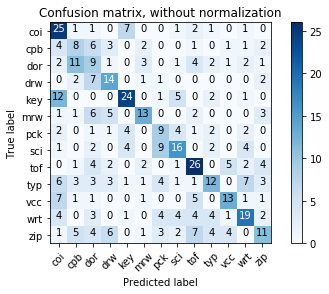

In [20]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names_short,
                      title='Confusion matrix, without normalization')

In [21]:
#report = metrics.classification_report(y_test, y_pred, target_names=class_names_short)
report = metrics.classification_report(y_test, y_pred)

In [22]:
report

'             precision    recall  f1-score   support\n\n          0       0.38      0.64      0.48        39\n          1       0.24      0.29      0.26        28\n          2       0.19      0.24      0.21        37\n          3       0.40      0.52      0.45        27\n          4       0.59      0.53      0.56        45\n          5       0.54      0.42      0.47        31\n          6       0.29      0.35      0.32        26\n          7       0.46      0.42      0.44        38\n          8       0.49      0.55      0.52        47\n          9       0.41      0.27      0.32        45\n         10       0.52      0.43      0.47        30\n         11       0.47      0.41      0.44        46\n         12       0.38      0.23      0.29        48\n\navg / total       0.42      0.41      0.41       487\n'

In [23]:
def classification_report_csv(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv('classification_report.csv', index = False)

classification_report_csv(report)